**End goal: to predict the class (g or h)**

In [27]:
# import necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [28]:
# import the dataset and set the column names

cols_name = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist',
             'class']

df = pd.read_csv('./magic04.data', names=cols_name)

In [29]:
# explore the dataset

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


**Engineer the class column**


In [30]:
# get the unique values of the class fields

df['class'].unique()

array(['g', 'h'], dtype=object)

In [31]:
# convert all values of g to 1 and h to 0

df['class'] = (df['class'] == 'g').astype(int)

In [32]:
# explore the dataset

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [33]:
# to explore fields that have good correlation with the target field

df.corr()[["class"]]

,class
fLength,-0.307572
fWidth,-0.265596
fSize,-0.117795
fConc,0.024615
fConc1,0.004797
fAsym,0.173587
fM3Long,0.193409
fM3Trans,-0.003837
fAlpha,-0.460979
fDist,-0.065203


**Data visualization**


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figur

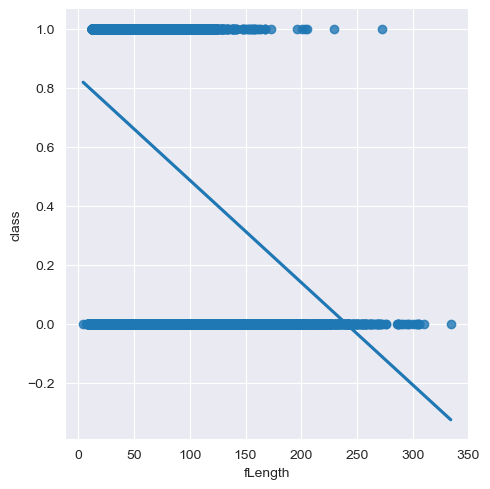

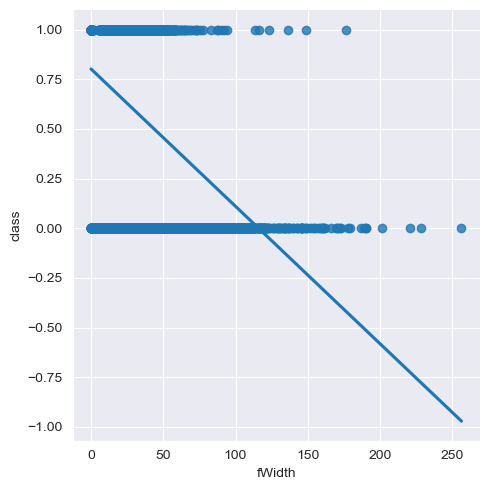

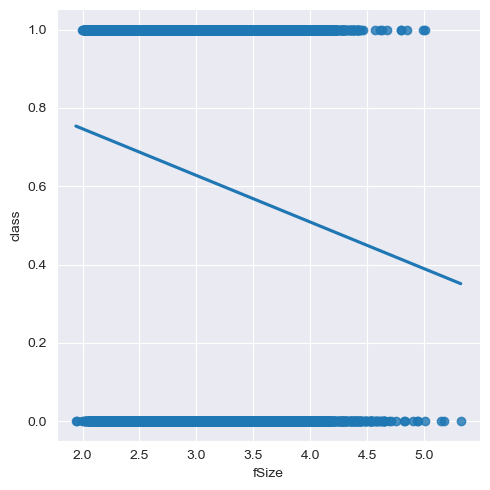

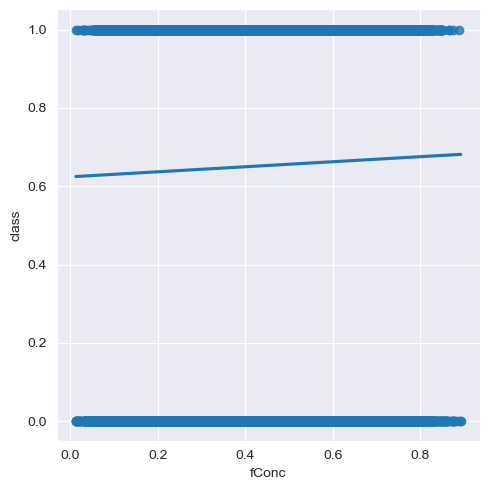

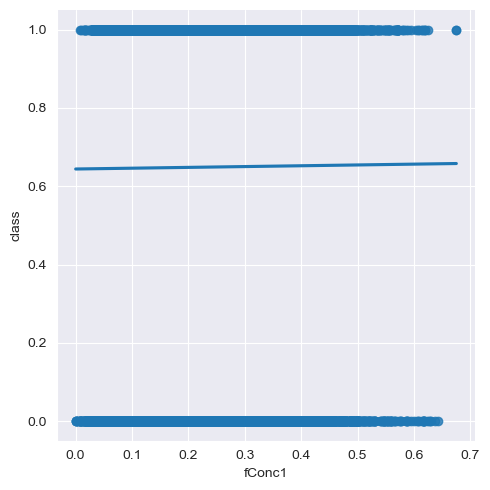

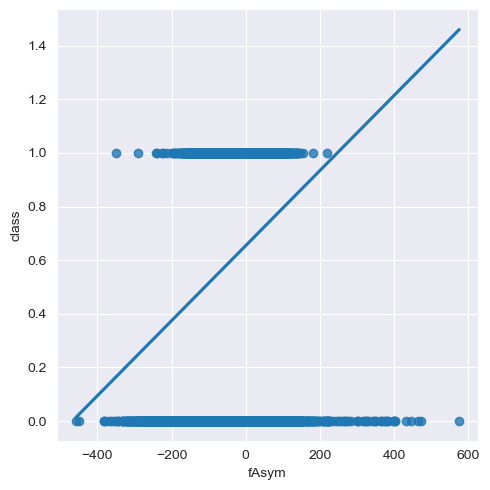

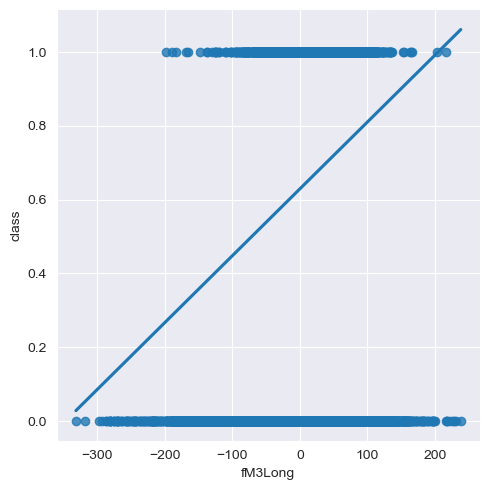

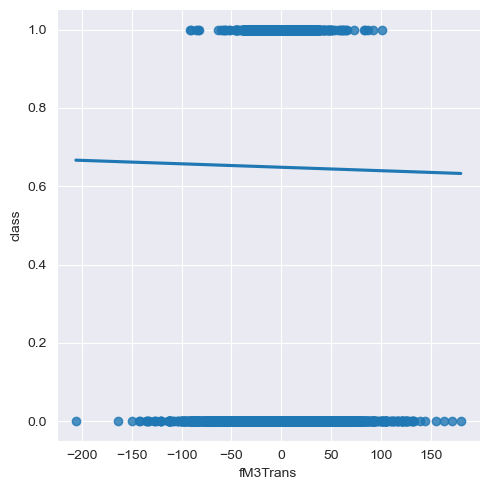

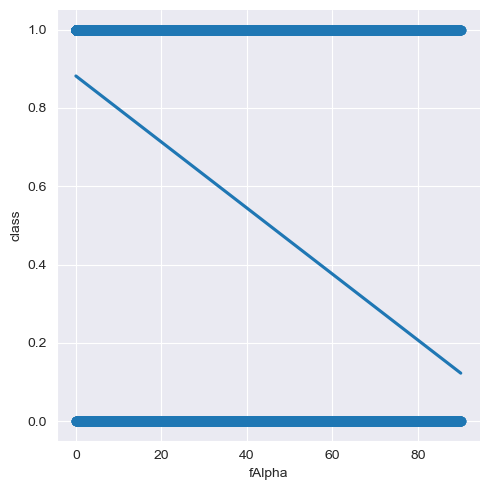

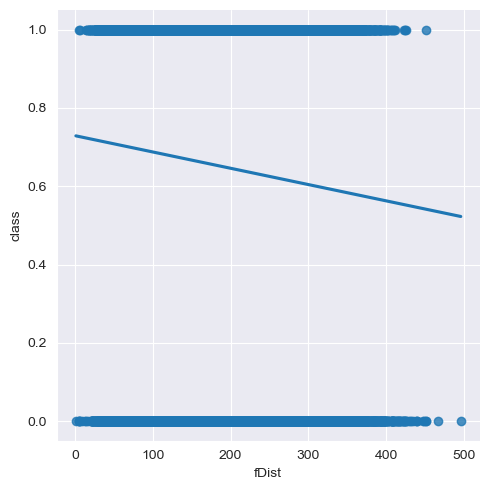

In [34]:
for label in cols_name[:-1]:
    sn.lmplot(y="class", x=label, data=df, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

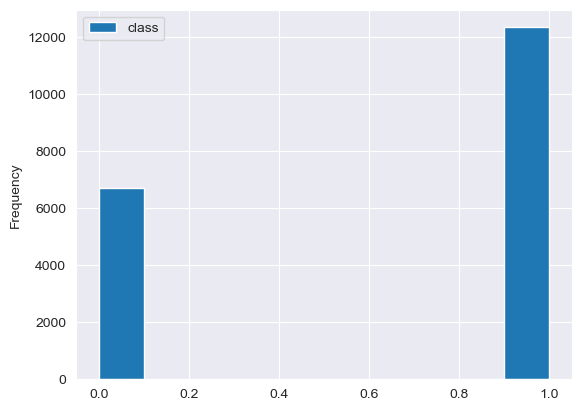

In [35]:
# explore the number of 1s yo 0s
df.plot.hist(y="class")

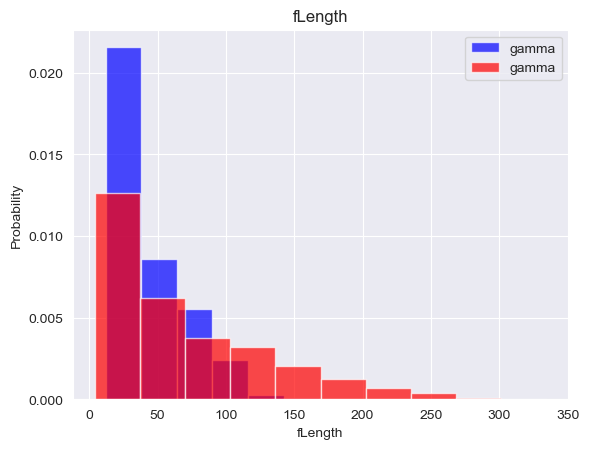

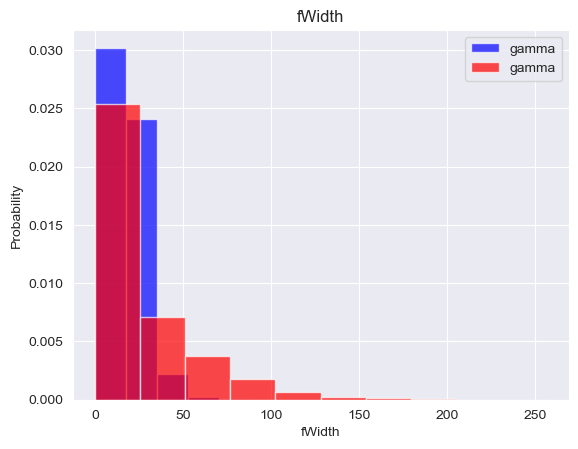

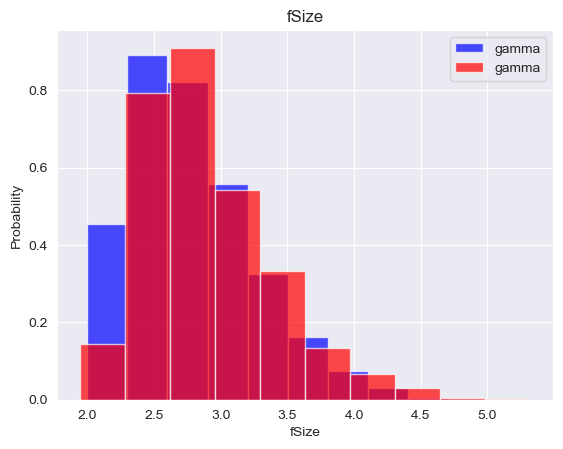

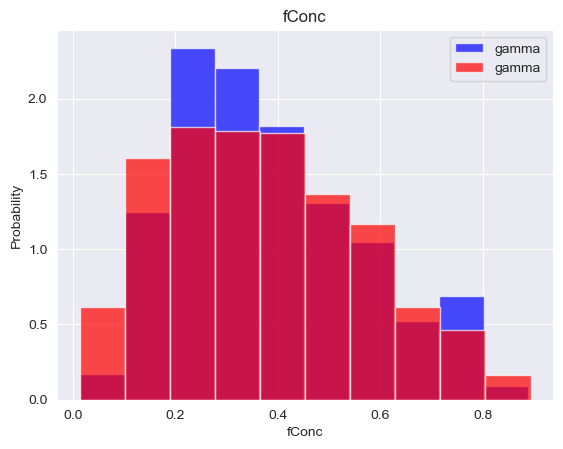

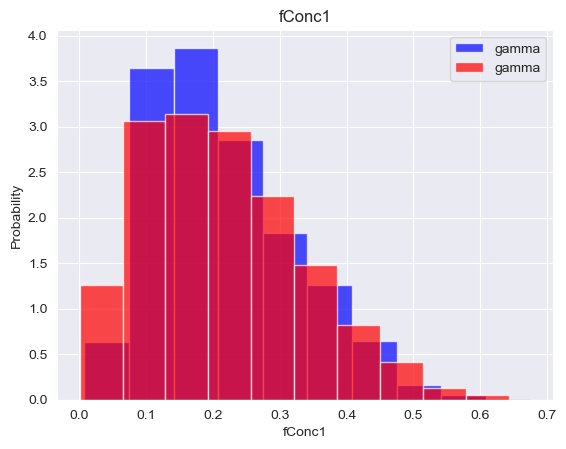

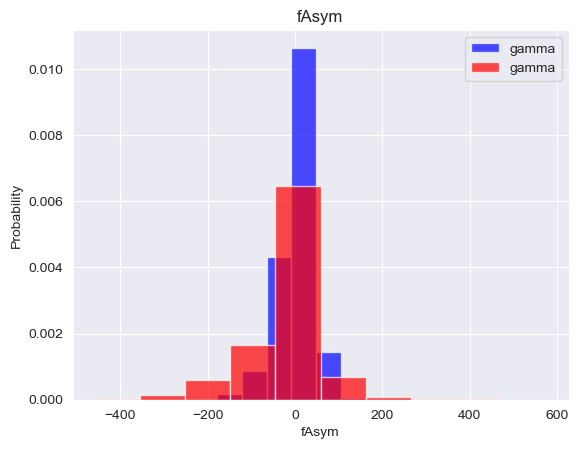

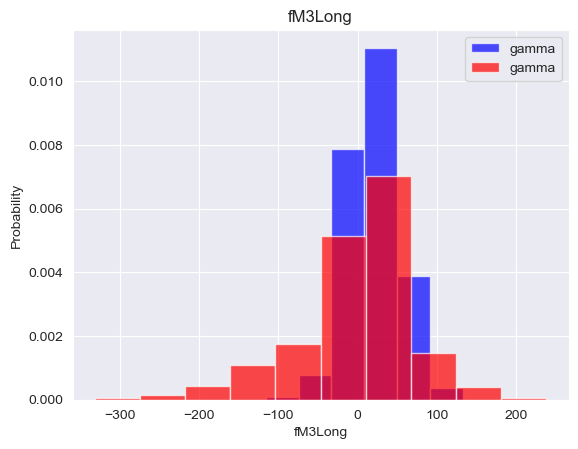

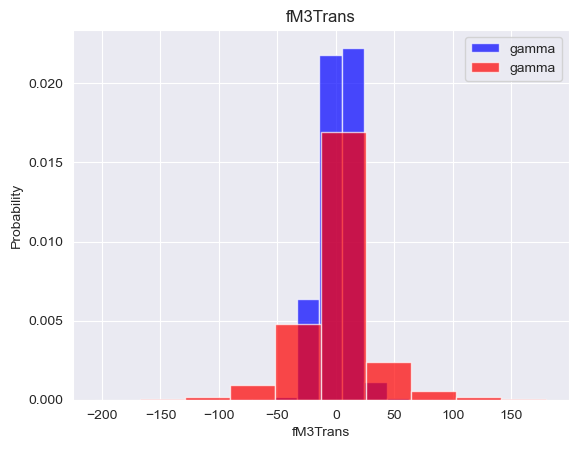

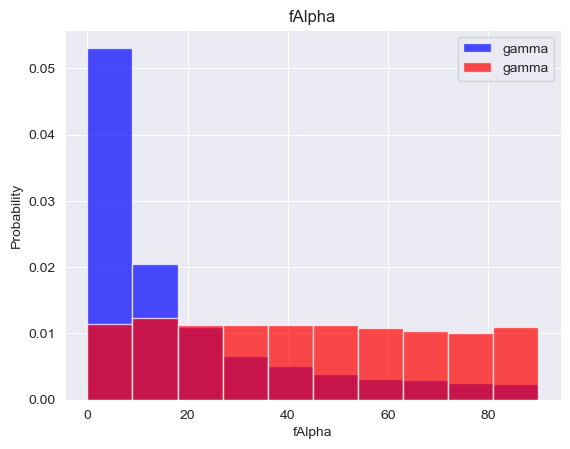

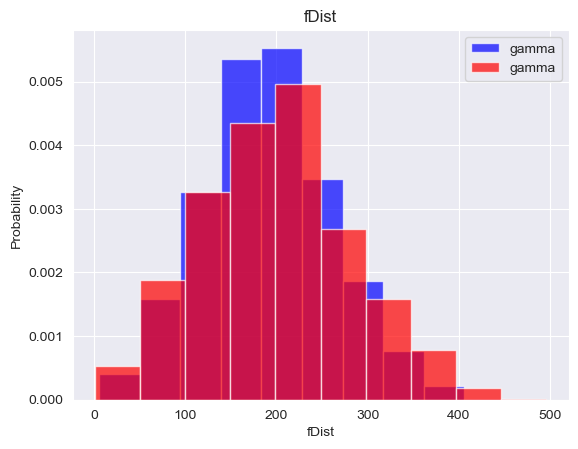

In [36]:
# plot a graph of the fields against the class since that's what i want my model to predict

for label in cols_name[:-1]:
    # alpha is transparency
    # density is to normalize the distribution (distribute over all the samples available)
    plt.hist(df[df['class'] == 1][label], color='blue',
             label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red',
             label='gamma', alpha=0.7, density=True)
    plt.title(label)
    # used probability cause can either be 1 (h) or 0 (g)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

**Splitting my dataset to train, validate and test**

*train = 60%
validate = 20%
test = 20%*

In [37]:
df_len = len(df)

train, validate, test = np.split(df.sample(frac=1),
                                 [int(0.6 * df_len), int(0.8 * df_len)])  # df.sample(frac=1) to shuffle dataset

once we sample the dataFrame we should note that the data are far apart 
hence there's a need to scale the dataset so that data should be relative to the mean and the standard deviation

In [38]:
def scale_dataset(dataFrame, overSample=False):
    X = dataFrame[dataFrame.columns[:-1]].values  # these are the columns needed for the prediction
    y = dataFrame[dataFrame.columns[-1]].values  # this is the predicted column

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if overSample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,
                                y)  # take more of the less class and keep sampling from there(pad it) to fit the more class

    # hstack = horizontal stack means place side by side
    # since X has been modified there's a need to reshape Y hence np.reshape()
    # np.reshape(y, (-1, 1)) -> makes this a 2D array and the -1 means to infer the dimension of the value i.e len(y) 
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

**Explore the data for 0 and 1 on train dataset**

In [39]:
print(len(train[train['class'] == 1]))  # gamma
print(len(train[train['class'] == 0]))

7388
4024


from this we can see that we've more 1s that 0s

this might make the train data bias hence

we need to over-sample to that the data matches 

In [40]:
train, X_train, y_train = scale_dataset(train, overSample=True)
validate, X_validate, y_validate = scale_dataset(validate, overSample=False)
test, X_test, y_test = scale_dataset(test, overSample=False)

class
class
class


In [41]:
len(y_train)

14776

In [42]:
sum(y_train == 1)

7388

In [43]:
sum(y_train == 0)

7388

now we can see that the sum of value of 1s is same as 0s

**KNN model**

In [44]:
# import necessary libraries for KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [45]:
knn_model = KNeighborsClassifier(
    n_neighbors=5)  # the number of neighbors you want to use to determine the classification default to 5
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1374
           1       0.84      0.87      0.86      2430

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



**Naive Bayes**

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [49]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50      1374
           1       0.73      0.91      0.81      2430

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804

